<a href="https://colab.research.google.com/github/tarunaditya91/Advanced-Computer-Vision-with-Python/blob/main/Image_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Apr 29 05:39:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__


'2.15.0'

In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/drive for image_detction

/content/drive/MyDrive/drive for image_detction


In [ ]:
%ls


test_set/  training_set/


In [ ]:
 %pwd

'/content/drive/MyDrive/drive for image_detction'

In [ ]:
import numpy as np
from glob import glob
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img



In [ ]:
%ls

test_set/  training_set/


In [ ]:
IMAGES_SIZE=[224,224]

train_path="training_set"
test_path="test_set"

In [ ]:
a=IMAGES_SIZE+[3]

In [ ]:
vgg16=VGG16(input_shape = IMAGES_SIZE + [3],weights="imagenet",include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg16.layers:
  print(layer)

In [ ]:
for layer in vgg16.layers:
  layer.trainable=False

In [ ]:
for layer in vgg16.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
folder=glob("training_set/*")

In [ ]:
folder

['training_set/cats', 'training_set/dogs']

In [ ]:
len(folder)

2

In [ ]:
#adding custom layer dense layer

In [ ]:
model=Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(2,activation="softmax"))




In [ ]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=['accuracy']

)

In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen=ImageDataGenerator(
    rescale=1./255)

In [ ]:
training_set=train_datagen.flow_from_directory(
    "training_set",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
    )

Found 2320 images belonging to 2 classes.


In [ ]:
testing_set=train_datagen.flow_from_directory(
    "test_set",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
    )

Found 2000 images belonging to 2 classes.


In [ ]:

history = model.fit(
    training_set,
    epochs=2,
    steps_per_epoch=len(training_set),
    validation_data=testing_set,
    validation_steps=len(testing_set)
)


Epoch 1/2
73/73 [==============================] - 861s 12s/step - loss: 0.8491 - accuracy: 0.7853 - val_loss: 0.2657 - val_accuracy: 0.8840
Epoch 2/2
73/73 [==============================] - 68s 933ms/step - loss: 0.1965 - accuracy: 0.9138 - val_loss: 0.4322 - val_accuracy: 0.7960


In [ ]:
history.history

{'loss': [0.8490974307060242, 0.19647860527038574],
 'accuracy': [0.7853448390960693, 0.9137930870056152],
 'val_loss': [0.26570528745651245, 0.4322499632835388],
 'val_accuracy': [0.8840000033378601, 0.7960000038146973]}

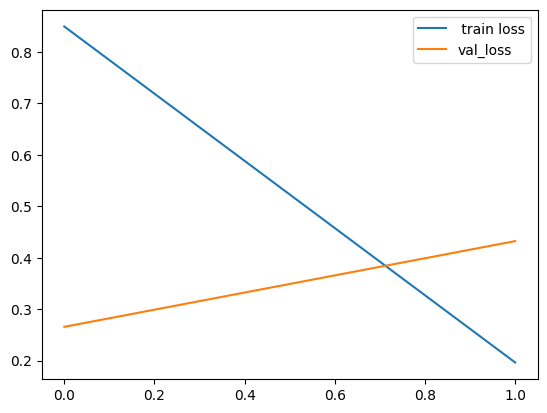

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label=' train loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()


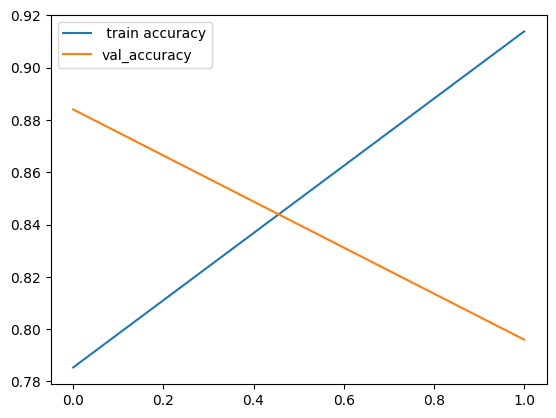

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label=' train accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()
plt.savefig("accuracy graph")

In [ ]:
model.save("moddel_vgg16.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

model=load_model('moddel_vgg16.h5')

In [ ]:
%ls

'accuracy graph.png'  'loss graph.png'   moddel_vgg16.h5   test_set/   training_set/


In [ ]:
y_predict=model.predict(testing_set)

63/63 [==============================] - 31s 500ms/step


In [ ]:
y_predict

array([[0.6973272 , 0.30267283],
       [0.00116784, 0.99883217],
       [0.90895396, 0.09104605],
       ...,
       [0.69524217, 0.3047578 ],
       [0.23733416, 0.7626658 ],
       [0.3416543 , 0.6583457 ]], dtype=float32)

In [ ]:
y_pred=np.argmax(y_predict,axis=1)

In [ ]:
y_pred

array([0, 1, 0, ..., 0, 1, 1])